In [4]:
from sklearn import datasets
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')
from nearest_neighbors import KNNClassifier

Mounted at /content/drive


In [14]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

In [6]:
data = datasets.fetch_openml("mnist_784")
# data

In [7]:
import time

In [8]:
from cross_validation import knn_cross_val_score

In [9]:
X_train, X_test = data['data'][:60000], data['data'][60000:]
y_train, y_test = np.array(data['target'][:60000], dtype=int), np.array(data['target'][60000:], dtype=int)
X_train.shape, y_train.shape, y_train

((60000, 784), (60000,), array([5, 0, 4, ..., 5, 6, 8]))

## Эксперемент 1

In [ ]:
rng = np.random.default_rng()
sample_10 = rng.choice(784, 10, False)
sample_20 = rng.choice(784, 20, False)
sample_100 = rng.choice(784, 100, False)
train_samples = [X_train[:, sample_10], X_train[:, sample_20], X_train[:, sample_100]]
test_samples = [X_test[:, sample_10], X_test[:, sample_20], X_test[:, sample_100]]
stratagies = ['my_own', 'brute', 'kd_tree', 'ball_tree']

In [ ]:
start = time.time()
clf = KNNClassifier(5, 'my_own', 'euclidean', False, 4)
clf.fit(X_train, y_train)
clf.find_kneighbors(X_test, False)
finish = time.time()
print(finish - start)

26.32133722305298


In [ ]:
start = time.time()
clf = KNNClassifier(5, 'brute', 'euclidean', False, 4)
clf.fit(X_train, y_train)
clf.find_kneighbors(X_test, False)
finish = time.time()
print(finish - start)

26.33659815788269


In [ ]:
for i in range(3):
  for strategy in stratagies:
    start = time.time()
    clf = KNNClassifier(5, strategy, 'euclidean', False, 4)
    clf.fit(train_samples[i], y_train)
    clf.find_kneighbors(test_samples[i], False)
    finish = time.time()
    print(strategy, ': ', finish - start)
    


my_own :  15.120441436767578
brute :  10.73365068435669
kd_tree :  4.160662412643433
ball_tree :  7.660752534866333
my_own :  14.11626935005188
brute :  11.321485757827759
kd_tree :  10.727381706237793
ball_tree :  24.075584173202515
my_own :  14.958858489990234
brute :  12.304533243179321
kd_tree :  179.205810546875
ball_tree :  207.1886785030365


In [ ]:
%time
print(knn_cross_val_score(X_train, y_train, [5], 'accuracy', cv=3, strategy='brute', metric='euclidean', weights=False))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
{5: array([0.9681, 0.9673, 0.9672])}


In [ ]:
%time
print(knn_cross_val_score(X_train[:, sample_100], y_train, [5], 'accuracy', cv=3, strategy='brute', metric='euclidean', weights=False))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
{5: array([0.8904 , 0.886  , 0.89125])}


## Эксперемент 2 и 3

In [ ]:
knn_false = {}
for m in ['euclidean', 'cosine']:
  start = time.time()
  knn_false[m] = knn_cross_val_score(data['data'], np.array(data['target'], dtype=int), np.arange(1, 11), 'accuracy', cv=3, 
                                  strategy='brute', metric=m, weights=False)
  print(m, ': ', knn_false)
  finish = time.time()
  print(finish - start)



euclidean :  {'euclidean': {1: array([0.96961515, 0.96725668, 0.96674238]), 2: array([0.96258678, 0.96138516, 0.96211374]), 3: array([0.96991515, 0.96819955, 0.9682424 ]), 4: array([0.9685009 , 0.9657138 , 0.96742811]), 5: array([0.96845804, 0.9660138 , 0.96759954]), 6: array([0.96807234, 0.96459949, 0.96652809]), 7: array([0.9681152 , 0.96524236, 0.9668281 ]), 8: array([0.96670095, 0.9640852 , 0.96622809]), 9: array([0.96614382, 0.96262804, 0.96567094]), 10: array([0.96541527, 0.9626709 , 0.96554236])}}
273.09833908081055
cosine :  {'euclidean': {1: array([0.96961515, 0.96725668, 0.96674238]), 2: array([0.96258678, 0.96138516, 0.96211374]), 3: array([0.96991515, 0.96819955, 0.9682424 ]), 4: array([0.9685009 , 0.9657138 , 0.96742811]), 5: array([0.96845804, 0.9660138 , 0.96759954]), 6: array([0.96807234, 0.96459949, 0.96652809]), 7: array([0.9681152 , 0.96524236, 0.9668281 ]), 8: array([0.96670095, 0.9640852 , 0.96622809]), 9: array([0.96614382, 0.96262804, 0.96567094]), 10: array([0.9

In [ ]:
knn_true = {}
for m in ['euclidean', 'cosine']:
  start = time.time()
  knn_true[m] = knn_cross_val_score(data['data'], np.array(data['target'], dtype=int), np.arange(1, 11), 'accuracy', cv=3, 
                                  strategy='brute', metric=m, weights=True)
  print(m, ': ', knn_true[m])
  finish = time.time()
  print(finish - start)

euclidean :  {1: array([0.96961515, 0.96725668, 0.96674238]), 2: array([0.96961515, 0.96725668, 0.96674238]), 3: array([0.9714151 , 0.96922813, 0.96931385]), 4: array([0.9721008 , 0.96935671, 0.969871  ]), 5: array([0.96978658, 0.9671281 , 0.96888527]), 6: array([0.97128653, 0.96717096, 0.96935671]), 7: array([0.96940087, 0.96622809, 0.96764239]), 8: array([0.96918659, 0.96678524, 0.96811383]), 9: array([0.9674295 , 0.96438521, 0.96691381]), 10: array([0.96764378, 0.96455664, 0.96665667])}
258.5757474899292
cosine :  {1: array([0.97411503, 0.97107102, 0.97111387]), 2: array([0.97411503, 0.97107102, 0.97111387]), 3: array([0.97475786, 0.9732139 , 0.97282818]), 4: array([0.97548641, 0.97295676, 0.97385677]), 5: array([0.97420074, 0.97308533, 0.97317105]), 6: array([0.975015  , 0.97257104, 0.97351391]), 7: array([0.97325791, 0.97115673, 0.97214246]), 8: array([0.9735579 , 0.97137102, 0.97257104]), 9: array([0.97257221, 0.96978528, 0.97124245]), 10: array([0.97188652, 0.970171  , 0.9713281

In [ ]:
knn_false_train = {}
for m in ['euclidean', 'cosine']:
  start = time.time()
  knn_false_train[m] = knn_cross_val_score(X_train, y_train, np.arange(1, 11), 'accuracy', cv=3, 
                                  strategy='brute', metric=m, weights=False)
  print(m, ': ', knn_false_train[m])
  finish = time.time()
  print(finish - start)

euclidean :  {1: array([0.96895, 0.96675, 0.9667 ]), 2: array([0.9603 , 0.95995, 0.96125]), 3: array([0.96955, 0.96825, 0.96715]), 4: array([0.96705, 0.9667 , 0.9671 ]), 5: array([0.9681, 0.9673, 0.9672]), 6: array([0.96555, 0.96495, 0.9657 ]), 7: array([0.9652, 0.965 , 0.9656]), 8: array([0.96415, 0.9639 , 0.96525]), 9: array([0.9637 , 0.9632 , 0.96455]), 10: array([0.96245, 0.9622 , 0.9637 ])}
187.1373815536499
cosine :  {1: array([0.9733 , 0.9708 , 0.97045]), 2: array([0.96895, 0.9664 , 0.96775]), 3: array([0.97365, 0.97155, 0.9709 ]), 4: array([0.9725 , 0.97095, 0.9722 ]), 5: array([0.97275, 0.97015, 0.9716 ]), 6: array([0.97195, 0.9697 , 0.97215]), 7: array([0.97125, 0.96815, 0.97075]), 8: array([0.97125, 0.96835, 0.97155]), 9: array([0.97005, 0.967  , 0.9707 ]), 10: array([0.96935, 0.96615, 0.9707 ])}
184.91912531852722


In [ ]:
knn_true_train = {}
for m in ['euclidean', 'cosine']:
  start = time.time()
  knn_true_train[m] = knn_cross_val_score(X_train, y_train, np.arange(1, 11), 'accuracy', cv=3, 
                                  strategy='brute', metric=m, weights=True)
  print(m, ': ', knn_true_train[m])
  finish = time.time()
  print(finish - start)

euclidean :  {1: array([0.96895, 0.96675, 0.9667 ]), 2: array([0.96895, 0.96675, 0.9667 ]), 3: array([0.97075, 0.9691 , 0.96825]), 4: array([0.9713, 0.9698, 0.9701]), 5: array([0.96925, 0.96825, 0.96875]), 6: array([0.9704 , 0.96845, 0.96945]), 7: array([0.96735, 0.96595, 0.967  ]), 8: array([0.9676 , 0.96665, 0.9678 ]), 9: array([0.9651, 0.9643, 0.9657]), 10: array([0.9647 , 0.96465, 0.9657 ])}
185.96527552604675
cosine :  {1: array([0.9733 , 0.9708 , 0.97045]), 2: array([0.9733 , 0.9708 , 0.97045]), 3: array([0.97495, 0.9725 , 0.97175]), 4: array([0.97545, 0.9732 , 0.97365]), 5: array([0.974  , 0.97095, 0.973  ]), 6: array([0.97465, 0.9714 , 0.97305]), 7: array([0.9726 , 0.9693 , 0.97195]), 8: array([0.97295, 0.97045, 0.9722 ]), 9: array([0.97165, 0.96865, 0.97145]), 10: array([0.97145, 0.96855, 0.9714 ])}
183.4543228149414


In [ ]:
accuracy = [knn_false, knn_true, knn_false_train, knn_true_train]

In [ ]:
new_accuracy = []
for i in range(4):
  new_accuracy.append({})
  for m in ['euclidean', 'cosine']:
    new_accuracy[i][m] = {}
    for k in accuracy[i][m]:
      new_accuracy[i][m][k] = accuracy[i][m][k].sum() / 3

print(new_accuracy)

[{'euclidean': {1: 0.9678714036607117, 2: 0.9620285634540031, 3: 0.9687856981507553, 4: 0.9672142673338193, 5: 0.9673571271297582, 6: 0.9663999761090759, 7: 0.9667285516193558, 8: 0.9656714138637494, 9: 0.9648142667206038, 10: 0.9645428446795833}, 'cosine': {1: 0.9720999712135132, 2: 0.9690142501919419, 3: 0.9730999806015425, 4: 0.9723142685603733, 5: 0.9723999822338865, 6: 0.9720142789682655, 7: 0.970928551008834, 8: 0.9707142726412946, 9: 0.969885699171598, 10: 0.9697285577429419}}, {'euclidean': {1: 0.9678714036607117, 2: 0.9678714036607117, 3: 0.969985693865592, 4: 0.9704428334576619, 5: 0.9685999830486504, 6: 0.9692713997837873, 7: 0.9677571193749303, 8: 0.9680285548851458, 9: 0.9662428401905454, 10: 0.9662856948844754}, 'cosine': {1: 0.9720999712135132, 2: 0.9720999712135132, 3: 0.9735999834588486, 4: 0.9740999801937931, 5: 0.9734857040709564, 6: 0.9736999812140236, 7: 0.9721856989684579, 8: 0.9724999848869506, 9: 0.9711999803966882, 10: 0.9711285606006154}}, {'euclidean': {1: 0.

In [ ]:
for acc in new_accuracy:
  for m in acc:
    max_key = max(acc[m], key=acc[m].get)
    print(m, max_key, acc[m][max_key])

euclidean 3 0.9687856981507553
cosine 3 0.9730999806015425
euclidean 4 0.9704428334576619
cosine 4 0.9740999801937931
euclidean 3 0.9683166666666668
cosine 3 0.9720333333333334
euclidean 4 0.9704
cosine 4 0.9741


## Эксперемент 4 (надо brute cosine true)




In [ ]:
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(X_train, y_train)

In [ ]:
y_predicted = clf.predict(X_test)

In [ ]:
np.sum(y_predicted == y_test) / y_test.shape[0]

0.9752

In [11]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_predicted, y_test)

array([[ 977,    0,    8,    0,    2,    4,    3,    2,    7,    7],
       [   1, 1129,    0,    1,    1,    0,    3,   10,    1,    7],
       [   0,    3, 1009,    3,    0,    0,    0,    4,    2,    2],
       [   0,    1,    1,  976,    0,    9,    0,    0,    9,    5],
       [   0,    0,    1,    1,  946,    1,    1,    1,    3,    7],
       [   0,    0,    0,   12,    0,  863,    3,    0,    3,    3],
       [   1,    2,    0,    0,    6,    7,  948,    0,    5,    1],
       [   1,    0,    8,    4,    2,    1,    0,  998,    4,    4],
       [   0,    0,    5,    9,    0,    4,    0,    0,  936,    3],
       [   0,    0,    0,    4,   25,    3,    0,   13,    4,  970]])

In [10]:
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
X_test[y_predicted != y_test][0].shape

(784,)

7 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

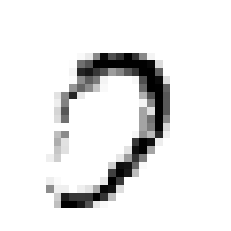

2 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

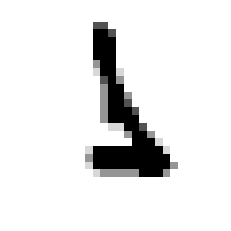

7 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

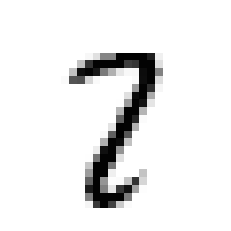

7 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

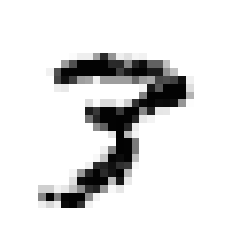

9 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

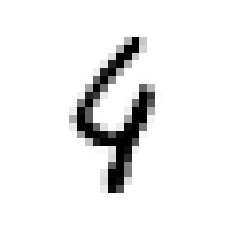

4 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

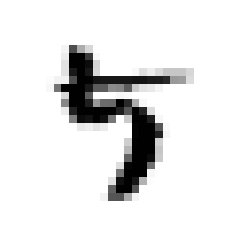

0 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

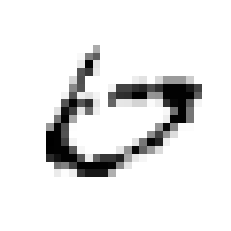

4 7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

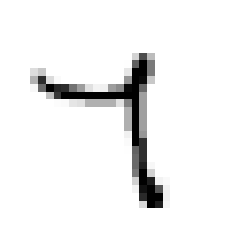

0 8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

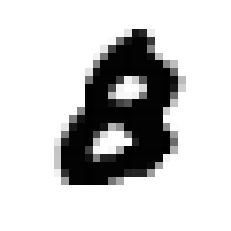

8 9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

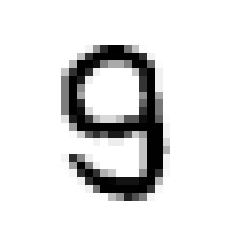

In [ ]:
wrong_predict = (y_predicted != y_test)
for i in range(10):
  fig, ax = plt.subplots()
  i_number = (y_test[wrong_predict] == i)
  im = ax.imshow(X_test[wrong_predict][i_number][0].reshape((28, 28)), cmap='Greys')
  plt.axis('off')
  print(y_predicted[wrong_predict][i_number][0], y_test[wrong_predict][i_number][0])
  # plt.savefig(str(y_test[wrong_predict][i_number][0]) + '_number.png')
  # files.download(str(y_test[wrong_predict][i_number][0]) + '_number.png')
  plt.show()

## Эксперимент 5

In [ ]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt

In [ ]:
from cross_validation import knn_cross_val_score

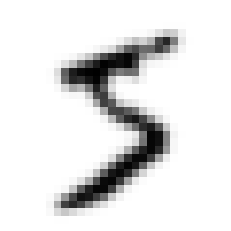

In [ ]:
img = ndimage.rotate(X_train[0].reshape((28, 28)), 10, reshape=False, prefilter=False)
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img, cmap='Greys')
plt.show()

In [ ]:
X = data['data']
y = np.array(data['target'], dtype=int)

In [16]:
def rotation_func(row):
  img = np.array(ndimage.rotate(row.reshape((28, 28)), angle, reshape=False, prefilter=False))
  return img.reshape((784, ))

In [20]:
def rotation_func(row):
  img = np.array(ndimage.rotate(row.reshape((28, 28)), 10, reshape=False, prefilter=False))
  return img.reshape((784, ))

In [ ]:
score_rotation = []
for angle in [-15, -10, -5, 5, 10, 15]:
  s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(rotation_func, -1, X)), axis=0),
                                   np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
  score_rotation.append(s)
  print(angle, s)

-15 {4: array([0.96615, 0.97185, 0.96795])}
-10 {4: array([0.9832 , 0.98025, 0.97815])}
-5 {4: array([0.9959 , 0.9937 , 0.99195])}
5 {4: array([0.9956 , 0.9941 , 0.99145])}
10 {4: array([0.98415, 0.9807 , 0.9779 ])}
15 {4: array([0.9693 , 0.97185, 0.96615])}


In [21]:
def shift_func(row):
  img = np.array(ndimage.shift(row.reshape((28, 28)), [0, 1], prefilter=False))
  return img.reshape((784, ))

In [ ]:
for i in [0, 1, 2, 3]:
  for j in [0, 1, 2, 3]:
    s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(shift_func, -1, X)), axis=0),
                                    np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
    score_shift[i, j] = s
    print(i, j, s)

0 0 {4: array([1.    , 1.    , 0.9999])}
0 1 {4: array([0.98375, 0.9813 , 0.97725])}
0 2 {4: array([0.964  , 0.96825, 0.96055])}
0 3 {4: array([0.9607, 0.9671, 0.9606])}
1 0 {4: array([0.98465, 0.98325, 0.9772 ])}
1 1 {4: array([0.96835, 0.9705 , 0.96385])}
1 2 {4: array([0.96215, 0.96715, 0.9596 ])}
1 3 {4: array([0.9603, 0.9669, 0.9605])}
2 0 {4: array([0.96055, 0.96815, 0.9625 ])}
2 1 {4: array([0.96075, 0.9671 , 0.96075])}
2 2 {4: array([0.9609 , 0.96665, 0.96005])}
2 3 {4: array([0.9604, 0.9669, 0.9605])}
3 0 {4: array([0.9603 , 0.96725, 0.96035])}
3 1 {4: array([0.9604 , 0.96675, 0.96035])}
3 2 {4: array([0.95965, 0.9664 , 0.9601 ])}
3 3 {4: array([0.9597, 0.9667, 0.9602])}


In [22]:
def gaus_func(row):
  img = np.array(ndimage.gaussian_filter(row.reshape((28, 28)), sigma=1.5))
  return img.reshape((784, ))

In [ ]:
score_gaus = []
for sigma in [0.5, 1, 1.5]:
  s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(gaus_func, -1, X)), axis=0),
                                    np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
  score_gaus.append(s)
  print(sigma, s)

0.5 {4: array([1., 1., 1.])}
1 {4: array([0.9955, 0.99  , 0.9849])}
1.5 {4: array([0.9888 , 0.97805, 0.96215])}


In [ ]:
confusion_matrix(y_test, y_test)

In [85]:
y1 = []
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(np.concatenate((np.array(X_train), np.apply_along_axis(rotation_func, -1, X_train)), axis=0), np.concatenate((y_train, y_train)))
result = clf.predict(X_test)
print(result)
y1 = result

[7 2 1 ... 4 5 6]


In [86]:
y2 = []
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(np.concatenate((np.array(X_train), np.apply_along_axis(shift_func, -1, X_train)), axis=0), np.concatenate((y_train, y_train)))
result = clf.predict(X_test)
print(result)
y2 = result

[7 2 1 ... 4 5 6]


In [87]:
y3 = []
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(np.concatenate((np.array(X_train), np.apply_along_axis(gaus_func, -1, X_train)), axis=0), np.concatenate((y_train, y_train)))
result = clf.predict(X_test)
print(result)
y3 = result

[7 2 1 ... 4 5 6]


In [62]:
len(y1[0])

10000

In [66]:
fin_y1 = []
for i in range (len(y_test)):
  fin_y1.append(np.argmax(np.bincount(np.array([y1[0][i], y2[0][i], y3[0][i]]))))

In [67]:
confusion_matrix(y_test, fin_y1)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1132,    3,    0,    0,    0,    0,    0,    0,    0],
       [   6,    1, 1011,    1,    0,    0,    1,    9,    3,    0],
       [   0,    0,    2,  990,    1,    5,    0,    4,    4,    4],
       [   0,    2,    0,    0,  956,    0,    4,    2,    0,   18],
       [   2,    0,    0,    9,    1,  869,    2,    1,    5,    3],
       [   3,    2,    0,    0,    0,    3,  950,    0,    0,    0],
       [   0,   12,    7,    0,    1,    1,    0, 1000,    0,    7],
       [   7,    0,    3,    9,    2,    3,    1,    4,  942,    3],
       [   2,    6,    1,    5,    5,    1,    1,    6,    3,  979]])

In [69]:
np.sum(fin_y1 == y_test)/y_test.shape[0]

0.9806

In [72]:
y1 = []
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(X_train, y_train)
result = clf.predict(np.concatenate((X_test, np.apply_along_axis(rotation_func, -1, X_test))))
print(result)
y1 = result

[7 2 1 ... 4 5 6]


In [73]:
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(X_train, y_train)
result = clf.predict(np.concatenate((X_test, np.apply_along_axis(shift_func, -1, X_test))))
print(result)
y2 = result

[7 2 1 ... 4 5 6]


In [74]:
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(X_train, y_train)
result = clf.predict(np.concatenate((X_test, np.apply_along_axis(gaus_func, -1, X_test))))
print(result)
y3 = result

[7 2 1 ... 4 5 6]


In [79]:
len(y3)

20000

In [80]:
fin_y1 = []
for i in range (len(y_test) * 2):
  fin_y1.append(np.argmax(np.bincount(np.array([y1[i], y2[i], y3[i]]))))

In [78]:
len(fin_y1)

10000

In [81]:
confusion_matrix(np.concatenate((y_test, y_test)), fin_y1)

array([[1953,    2,    0,    0,    0,    1,    2,    2,    0,    0],
       [   0, 2258,    5,    3,    0,    0,    4,    0,    0,    0],
       [  29,    1, 1996,    2,    1,    0,    1,   20,   14,    0],
       [   4,    2,    6, 1943,    1,   16,    0,   10,   28,   10],
       [  14,    5,    1,    0, 1860,    0,   17,    2,    0,   65],
       [  15,    3,    0,   30,    1, 1680,   27,    1,   18,    9],
       [  12,    6,    0,    0,    2,    3, 1892,    0,    1,    0],
       [   6,   21,   10,    0,    4,    0,    0, 1968,    1,   46],
       [  13,    9,    3,   10,    8,    8,    9,   10, 1870,    8],
       [  27,   14,    3,   10,   14,    7,    4,    8,    8, 1923]])

In [84]:
np.sum(fin_y1 == np.concatenate((y_test, y_test)))/(y_test.shape[0] * 2)

0.96715

In [104]:
conf_matrix = np.array([[1953,    2,    0,    0,    0,    1,    2,    2,    0,    0],
       [   0, 2258,    5,    3,    0,    0,    4,    0,    0,    0],
       [  29,    1, 1996,    2,    1,    0,    1,   20,   14,    0],
       [   4,    2,    6, 1943,    1,   16,    0,   10,   28,   10],
       [  14,    5,    1,    0, 1860,    0,   17,    2,    0,   65],
       [  15,    3,    0,   30,    1, 1680,   27,    1,   18,    9],
       [  12,    6,    0,    0,    2,    3, 1892,    0,    1,    0],
       [   6,   21,   10,    0,    4,    0,    0, 1968,    1,   46],
       [  13,    9,    3,   10,    8,    8,    9,   10, 1870,    8],
       [  27,   14,    3,   10,   14,    7,    4,    8,    8, 1923]]) //2
       
conf_matrix

array([[ 976,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    2,    1,    0,    0,    2,    0,    0,    0],
       [  14,    0,  998,    1,    0,    0,    0,   10,    7,    0],
       [   2,    1,    3,  971,    0,    8,    0,    5,   14,    5],
       [   7,    2,    0,    0,  930,    0,    8,    1,    0,   32],
       [   7,    1,    0,   15,    0,  840,   13,    0,    9,    4],
       [   6,    3,    0,    0,    1,    1,  946,    0,    0,    0],
       [   3,   10,    5,    0,    2,    0,    0,  984,    0,   23],
       [   6,    4,    1,    5,    4,    4,    4,    5,  935,    4],
       [  13,    7,    1,    5,    7,    3,    2,    4,    4,  961]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

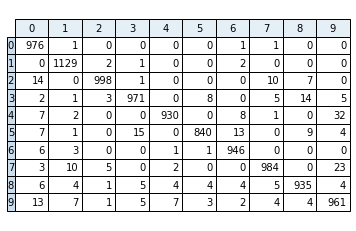

In [105]:
fig, ax = plt.subplots()
rcolors = plt.cm.BuPu(np.full(10, 0.2))
ccolors = plt.cm.BuPu(np.full(10, 0.1))

the_table = plt.table(cellText=conf_matrix,
                      rowLabels=np.arange(10),
                      rowColours=rcolors,
                      colWidths=[0.1]*11,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=np.arange(10),
                      loc='center')

cellDict = the_table.get_celld()
for i in range(0 ,10):
    cellDict[(0,i)].set_height(.08)
    for j in range(0,11):
        cellDict[(j,i)].set_height(.08)
      
for i in range(1, 11):
  cellDict[(i,-1)].set_height(.08)
  cellDict[(i,-1)].set_width(.1)


plt.axis('off')

plt.savefig('conf_test.pdf')
files.download('conf_test.pdf')
plt.show()

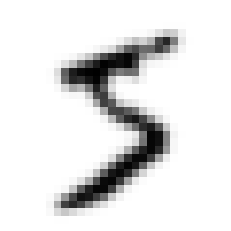

In [ ]:
img = ndimage.rotate(X_train[0].reshape((28, 28)), 10, reshape=False, prefilter=False)
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img, cmap='Greys')
plt.show()

In [ ]:
X = data['data'][:30000]
y = np.array(data['target'], dtype=int)[:30000]

In [ ]:
def rotation_func(row):
  img = np.array(ndimage.rotate(row.reshape((28, 28)), angle, reshape=False, prefilter=False))
  return img.reshape((784, ))

In [ ]:
score = knn_cross_val_score(X, y, [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
score

{4: array([0.9681, 0.9703, 0.9622])}

In [ ]:
score_rotation = []
for angle in [-15, -10, -5, 5, 10, 15]:
  s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(rotation_func, -1, X)), axis=0),
                                   np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
  score_rotation.append(s)
  print(angle, s)

-15 {4: array([0.96615, 0.97185, 0.96795])}
-10 {4: array([0.9832 , 0.98025, 0.97815])}
-5 {4: array([0.9959 , 0.9937 , 0.99195])}
5 {4: array([0.9956 , 0.9941 , 0.99145])}
10 {4: array([0.98415, 0.9807 , 0.9779 ])}
15 {4: array([0.9693 , 0.97185, 0.96615])}


In [ ]:
a = [{4: np.array([0.96615, 0.97185, 0.96795])},
{4: np.array([0.9832 , 0.98025, 0.97815])},
{4: np.array([0.9959 , 0.9937 , 0.99195])},
{4: np.array([0.9956 , 0.9941 , 0.99145])},
{4: np.array([0.98415, 0.9807 , 0.9779 ])},
{4: np.array([0.9693 , 0.97185, 0.96615])}]
for elem in a:
  print(elem[4].mean())



0.9686499999999999
0.9805333333333333
0.99385
0.9937166666666667
0.9809166666666668
0.9691


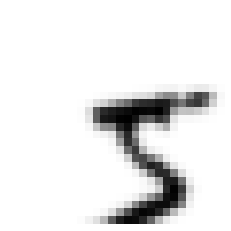

In [ ]:
img = ndimage.shift(X_train[0].reshape((28, 28)), shift=[6, 3], prefilter=False)
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img, cmap='Greys')
plt.show()

In [ ]:
score_shift = np.empty((4, 4), dtype=dict)

In [ ]:
def shift_func(row):
  img = np.array(ndimage.shift(row.reshape((28, 28)), [i, j], prefilter=False))
  return img.reshape((784, ))

In [ ]:
for i in [0, 1, 2, 3]:
  for j in [0, 1, 2, 3]:
    s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(shift_func, -1, X)), axis=0),
                                    np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
    score_shift[i, j] = s
    print(i, j, s)

0 0 {4: array([1.    , 1.    , 0.9999])}
0 1 {4: array([0.98375, 0.9813 , 0.97725])}
0 2 {4: array([0.964  , 0.96825, 0.96055])}
0 3 {4: array([0.9607, 0.9671, 0.9606])}
1 0 {4: array([0.98465, 0.98325, 0.9772 ])}
1 1 {4: array([0.96835, 0.9705 , 0.96385])}
1 2 {4: array([0.96215, 0.96715, 0.9596 ])}
1 3 {4: array([0.9603, 0.9669, 0.9605])}
2 0 {4: array([0.96055, 0.96815, 0.9625 ])}
2 1 {4: array([0.96075, 0.9671 , 0.96075])}
2 2 {4: array([0.9609 , 0.96665, 0.96005])}
2 3 {4: array([0.9604, 0.9669, 0.9605])}
3 0 {4: array([0.9603 , 0.96725, 0.96035])}
3 1 {4: array([0.9604 , 0.96675, 0.96035])}
3 2 {4: array([0.95965, 0.9664 , 0.9601 ])}
3 3 {4: array([0.9597, 0.9667, 0.9602])}


In [ ]:
a = [{4: np.array([1.    , 1.    , 0.9999])},
{4: np.array([0.98375, 0.9813 , 0.97725])},
{4: np.array([0.964  , 0.96825, 0.96055])},
{4: np.array([0.9607, 0.9671, 0.9606])},
{4: np.array([0.98465, 0.98325, 0.9772 ])},
{4: np.array([0.96835, 0.9705 , 0.96385])},
{4: np.array([0.96215, 0.96715, 0.9596 ])},
{4: np.array([0.9603, 0.9669, 0.9605])},
{4: np.array([0.96055, 0.96815, 0.9625 ])},
{4: np.array([0.96075, 0.9671 , 0.96075])},
{4: np.array([0.9609 , 0.96665, 0.96005])},
{4: np.array([0.9604, 0.9669, 0.9605])},
{4: np.array([0.9603 , 0.96725, 0.96035])},
{4: np.array([0.9604 , 0.96675, 0.96035])},
{4: np.array([0.95965, 0.9664 , 0.9601 ])},
{4: np.array([0.9597, 0.9667, 0.9602])}]
for elem in a:
  print(elem[4].mean())

0.9999666666666668
0.9807666666666667
0.9642666666666667
0.9628
0.9817
0.9675666666666666
0.9629666666666666
0.9625666666666667
0.9637333333333333
0.9628666666666666
0.9625333333333334
0.9626
0.9626333333333333
0.9625
0.96205
0.9622


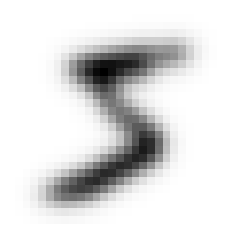

In [ ]:
img = ndimage.gaussian_filter(X_train[0].reshape((28, 28)), sigma=1.5)
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img, cmap='Greys')
plt.show()

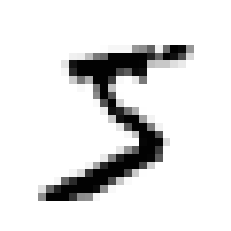

In [ ]:
img = ndimage.gaussian_filter(X_train[0].reshape((28, 28)), sigma=0.5)
fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(X_train[0].reshape((28, 28)), cmap='Greys')
plt.show()

In [ ]:
def gaus_func(row):
  img = np.array(ndimage.gaussian_filter(row.reshape((28, 28)), sigma=sigma))
  return img.reshape((784, ))

In [ ]:
score_gaus = []
for sigma in [0.5, 1, 1.5]:
  s = knn_cross_val_score(np.concatenate((np.array(X), np.apply_along_axis(gaus_func, -1, X)), axis=0),
                                    np.concatenate((y, y)), [4], 'accuracy', cv=3, strategy='brute', metric='cosine', weights=True)
  score_gaus.append(s)
  print(sigma, s)

0.5 {4: array([1., 1., 1.])}
1 {4: array([0.9955, 0.99  , 0.9849])}
1.5 {4: array([0.9888 , 0.97805, 0.96215])}


In [ ]:
a = [{4: np.array([1., 1., 1.])},
{4: np.array([0.9955, 0.99  , 0.9849])},
{4: np.array([0.9888 , 0.97805, 0.96215])}]
for elem in a:
  print(elem[4].mean())

1.0
0.9901333333333334
0.9763333333333333


In [ ]:
a = [{'euclidean': {1: 0.9678714036607117, 2: 0.9620285634540031, 3: 0.9687856981507553, 4: 0.9672142673338193, 5: 0.9673571271297582, 6: 0.9663999761090759, 7: 0.9667285516193558, 8: 0.9656714138637494, 9: 0.9648142667206038, 10: 0.9645428446795833}, 'cosine': {1: 0.9720999712135132, 2: 0.9690142501919419, 3: 0.9730999806015425, 4: 0.9723142685603733, 5: 0.9723999822338865, 6: 0.9720142789682655, 7: 0.970928551008834, 8: 0.9707142726412946, 9: 0.969885699171598, 10: 0.9697285577429419}}, {'euclidean': {1: 0.9678714036607117, 2: 0.9678714036607117, 3: 0.969985693865592, 4: 0.9704428334576619, 5: 0.9685999830486504, 6: 0.9692713997837873, 7: 0.9677571193749303, 8: 0.9680285548851458, 9: 0.9662428401905454, 10: 0.9662856948844754}, 'cosine': {1: 0.9720999712135132, 2: 0.9720999712135132, 3: 0.9735999834588486, 4: 0.9740999801937931, 5: 0.9734857040709564, 6: 0.9736999812140236, 7: 0.9721856989684579, 8: 0.9724999848869506, 9: 0.9711999803966882, 10: 0.9711285606006154}}, {'euclidean': {1: 0.9674666666666667, 2: 0.9605, 3: 0.9683166666666668, 4: 0.9669499999999999, 5: 0.9675333333333334, 6: 0.9653999999999999, 7: 0.9652666666666666, 8: 0.9644333333333334, 9: 0.9638166666666667, 10: 0.9627833333333333}, 'cosine': {1: 0.9715166666666667, 2: 0.9677000000000001, 3: 0.9720333333333334, 4: 0.9718833333333333, 5: 0.9714999999999999, 6: 0.9712666666666667, 7: 0.97005, 8: 0.9703833333333334, 9: 0.9692500000000001, 10: 0.9687333333333333}}, {'euclidean': {1: 0.9674666666666667, 2: 0.9674666666666667, 3: 0.9693666666666667, 4: 0.9704, 5: 0.96875, 6: 0.9694333333333334, 7: 0.9667666666666667, 8: 0.96735, 9: 0.9650333333333334, 10: 0.9650166666666666}, 'cosine': {1: 0.9715166666666667, 2: 0.9715166666666667, 3: 0.9730666666666666, 4: 0.9741, 5: 0.9726499999999999, 6: 0.9730333333333334, 7: 0.9712833333333334, 8: 0.9718666666666667, 9: 0.9705833333333334, 10: 0.9704666666666667}}]
a


[{'cosine': {1: 0.9720999712135132,
   2: 0.9690142501919419,
   3: 0.9730999806015425,
   4: 0.9723142685603733,
   5: 0.9723999822338865,
   6: 0.9720142789682655,
   7: 0.970928551008834,
   8: 0.9707142726412946,
   9: 0.969885699171598,
   10: 0.9697285577429419},
  'euclidean': {1: 0.9678714036607117,
   2: 0.9620285634540031,
   3: 0.9687856981507553,
   4: 0.9672142673338193,
   5: 0.9673571271297582,
   6: 0.9663999761090759,
   7: 0.9667285516193558,
   8: 0.9656714138637494,
   9: 0.9648142667206038,
   10: 0.9645428446795833}},
 {'cosine': {1: 0.9720999712135132,
   2: 0.9720999712135132,
   3: 0.9735999834588486,
   4: 0.9740999801937931,
   5: 0.9734857040709564,
   6: 0.9736999812140236,
   7: 0.9721856989684579,
   8: 0.9724999848869506,
   9: 0.9711999803966882,
   10: 0.9711285606006154},
  'euclidean': {1: 0.9678714036607117,
   2: 0.9678714036607117,
   3: 0.969985693865592,
   4: 0.9704428334576619,
   5: 0.9685999830486504,
   6: 0.9692713997837873,
   7: 0.967757

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

AttributeError: ignored

## Эксперимент 6

In [ ]:
clf = KNNClassifier(4, 'brute', 'cosine', True)
clf.fit(X_train, y_train)

In [ ]:
scores = 
for angle in [-15, -10, -5, 5, 10, 15]:
  y = clf.predict(np.apply_along_axis(rotation_func, -1, X)), axis=0)
  score_rotation.append(s)
  print(angle, s)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [ ]:
a = [{'euclidean': {1: 0.9678714036607117, 2: 0.9620285634540031, 3: 0.9687856981507553, 4: 0.9672142673338193, 5: 0.9673571271297582, 6: 0.9663999761090759, 7: 0.9667285516193558, 8: 0.9656714138637494, 9: 0.9648142667206038, 10: 0.9645428446795833}, 'cosine': {1: 0.9720999712135132, 2: 0.9690142501919419, 3: 0.9730999806015425, 4: 0.9723142685603733, 5: 0.9723999822338865, 6: 0.9720142789682655, 7: 0.970928551008834, 8: 0.9707142726412946, 9: 0.969885699171598, 10: 0.9697285577429419}}, {'euclidean': {1: 0.9678714036607117, 2: 0.9678714036607117, 3: 0.969985693865592, 4: 0.9704428334576619, 5: 0.9685999830486504, 6: 0.9692713997837873, 7: 0.9677571193749303, 8: 0.9680285548851458, 9: 0.9662428401905454, 10: 0.9662856948844754}, 'cosine': {1: 0.9720999712135132, 2: 0.9720999712135132, 3: 0.9735999834588486, 4: 0.9740999801937931, 5: 0.9734857040709564, 6: 0.9736999812140236, 7: 0.9721856989684579, 8: 0.9724999848869506, 9: 0.9711999803966882, 10: 0.9711285606006154}}, {'euclidean': {1: 0.9674666666666667, 2: 0.9605, 3: 0.9683166666666668, 4: 0.9669499999999999, 5: 0.9675333333333334, 6: 0.9653999999999999, 7: 0.9652666666666666, 8: 0.9644333333333334, 9: 0.9638166666666667, 10: 0.9627833333333333}, 'cosine': {1: 0.9715166666666667, 2: 0.9677000000000001, 3: 0.9720333333333334, 4: 0.9718833333333333, 5: 0.9714999999999999, 6: 0.9712666666666667, 7: 0.97005, 8: 0.9703833333333334, 9: 0.9692500000000001, 10: 0.9687333333333333}}, {'euclidean': {1: 0.9674666666666667, 2: 0.9674666666666667, 3: 0.9693666666666667, 4: 0.9704, 5: 0.96875, 6: 0.9694333333333334, 7: 0.9667666666666667, 8: 0.96735, 9: 0.9650333333333334, 10: 0.9650166666666666}, 'cosine': {1: 0.9715166666666667, 2: 0.9715166666666667, 3: 0.9730666666666666, 4: 0.9741, 5: 0.9726499999999999, 6: 0.9730333333333334, 7: 0.9712833333333334, 8: 0.9718666666666667, 9: 0.9705833333333334, 10: 0.9704666666666667}}]
a = a[:2]

In [ ]:
for acc in a:
  for m in acc:
    print(list(acc[m].values()))
    min_key = min(acc[m], key=acc[m].get)
    # print(m, min_key, acc[m][min_key])

[0.9678714036607117, 0.9620285634540031, 0.9687856981507553, 0.9672142673338193, 0.9673571271297582, 0.9663999761090759, 0.9667285516193558, 0.9656714138637494, 0.9648142667206038, 0.9645428446795833]
[0.9720999712135132, 0.9690142501919419, 0.9730999806015425, 0.9723142685603733, 0.9723999822338865, 0.9720142789682655, 0.970928551008834, 0.9707142726412946, 0.969885699171598, 0.9697285577429419]
[0.9678714036607117, 0.9678714036607117, 0.969985693865592, 0.9704428334576619, 0.9685999830486504, 0.9692713997837873, 0.9677571193749303, 0.9680285548851458, 0.9662428401905454, 0.9662856948844754]
[0.9720999712135132, 0.9720999712135132, 0.9735999834588486, 0.9740999801937931, 0.9734857040709564, 0.9736999812140236, 0.9721856989684579, 0.9724999848869506, 0.9711999803966882, 0.9711285606006154]


In [ ]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:

from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

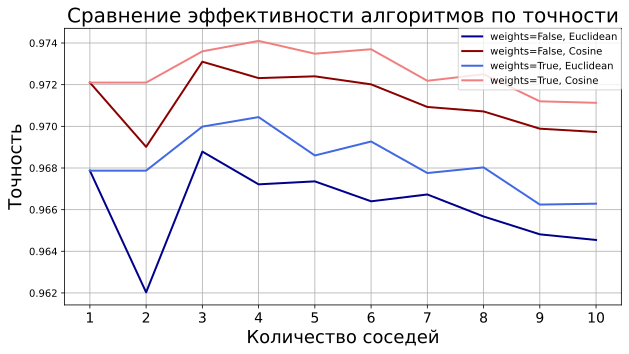

In [ ]:
with plt.style.context("default"):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()
    
    plt.title("Сравнение эффективности алгоритмов по точности", fontsize=20)
    plt.xlabel("Количество соседей", fontsize=18)
    plt.ylabel("Точность", fontsize=18)
    ax.set_xticks(np.arange(1, 11))
    ax.set_xticklabels(np.arange(1, 11), fontsize=14)
    # ax.set_yticklabels(np.linspace(0.96, 0.99, 7), rotation=45, fontsize=14)

    lw = 2
    color = ["darkblue", "darkred", "royalblue", "lightcoral"]
    labels = ['weights=False, Euclidean', 'weights=False, Cosine','weights=True, Euclidean', 'weights=True, Cosine']
    i = 0
    for acc in a:
      for m in acc:
        plt.plot(np.arange(1, 11), list(acc[m].values()), color=color[i], linewidth=lw, label=labels[i])
        i += 1

    plt.legend(loc='upper right', borderaxespad=0.)
    plt.grid()
    #plt.ylim(-10,400)
    
    fig.savefig("plot_1.pdf", bbox_inches = 'tight')
    files.download('plot_1.pdf')

    plt.show()

In [ ]:
np.linspace(0.96, 0.99, 7)

array([0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ])

# Для 4 эксперемента

In [ ]:
conf_matrix = np.array([[1953,    2,    0,    0,    0,    1,    2,    2,    0,    0],
       [   0, 2258,    5,    3,    0,    0,    4,    0,    0,    0],
       [  29,    1, 1996,    2,    1,    0,    1,   20,   14,    0],
       [   4,    2,    6, 1943,    1,   16,    0,   10,   28,   10],
       [  14,    5,    1,    0, 1860,    0,   17,    2,    0,   65],
       [  15,    3,    0,   30,    1, 1680,   27,    1,   18,    9],
       [  12,    6,    0,    0,    2,    3, 1892,    0,    1,    0],
       [   6,   21,   10,    0,    4,    0,    0, 1968,    1,   46],
       [  13,    9,    3,   10,    8,    8,    9,   10, 1870,    8],
       [  27,   14,    3,   10,   14,    7,    4,    8,    8, 1923]])
conf_matrix //= 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

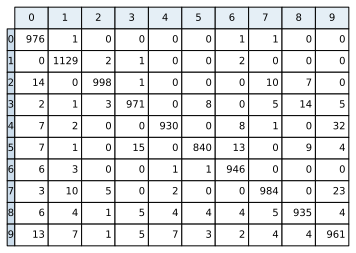

In [ ]:
fig, ax = plt.subplots()
rcolors = plt.cm.BuPu(np.full(10, 0.2))
ccolors = plt.cm.BuPu(np.full(10, 0.1))

the_table = plt.table(cellText=conf_matrix,
                      rowLabels=np.arange(10),
                      rowColours=rcolors,
                      colWidths=[0.1]*11,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=np.arange(10),
                      loc='center')

cellDict = the_table.get_celld()
for i in range(0 ,10):
    cellDict[(0,i)].set_height(.1)
    for j in range(0,11):
        cellDict[(j,i)].set_height(.1)
      
for i in range(1, 11):
  cellDict[(i,-1)].set_height(.1)
  cellDict[(i,-1)].set_width(.1)


plt.axis('off')

plt.savefig('conf4.pdf')
files.download('conf4.pdf')
plt.show()

In [ ]:
cellDict = the_table.get_celld()
for i in range(0 ,10):
    cellDict[(0,i)].set_height(.1)
    for j in range(0,11):
        cellDict[(j,i)].set_height(.1)
      
for i in range(1, 11):
  cellDict[(i,-1)].set_height(.1)
  cellDict[(i,-1)].set_width(.10)

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(conf_matrix, index=np.arange(10), columns=np.arange(10))
df

,0,1,2,3,4,5,6,7,8,9
0,977,0,8,0,2,4,3,2,7,7
1,1,1129,0,1,1,0,3,10,1,7
2,0,3,1009,3,0,0,0,4,2,2
3,0,1,1,976,0,9,0,0,9,5
4,0,0,1,1,946,1,1,1,3,7
5,0,0,0,12,0,863,3,0,3,3
6,1,2,0,0,6,7,948,0,5,1
7,1,0,8,4,2,1,0,998,4,4
8,0,0,5,9,0,4,0,0,936,3
9,0,0,0,4,25,3,0,13,4,970


In [ ]:
from pandas.plotting import table

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

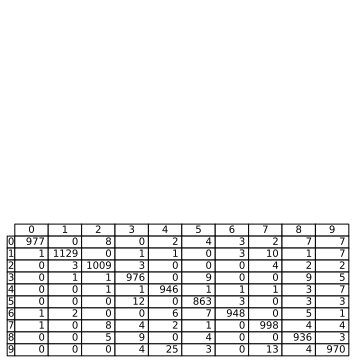

In [ ]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)
plt.savefig('sparse-1.pdf')
files.download('sparse-1.pdf')